In [248]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import category_encoders as ce

from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')


import pickle   # for saving the model

In [97]:
s1 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2005-06_skaters.csv')
s2 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2006-07_skaters.csv')
s3 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2007-08_skaters.csv')
s4 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2008-09_skaters.csv')
s5 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2009-10_skaters.csv')
s6 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2010-11_skaters.csv')
s7 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2011-12_skaters.csv')
s8 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2012-13_skaters.csv') 
s9 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2013-14_skaters.csv')
s10 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2014-15_skaters.csv')
s11 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2015-16_skaters.csv')
s12 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2016-17_skaters.csv')
s13 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2017-18_skaters.csv')
s14 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2018-19_skaters.csv')
s15 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2019-20_skaters.csv')
s16 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2020-21_skaters.csv')

test = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2021-22_skaters.csv')

In [173]:
s1

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,PP,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI
0,1,Ramzi Abid\abidra01,25,ATL,LW,6,0,2,2,1,6,0.1,0,0,0,0,2,0,0,6,0.0,49,8:10
1,2,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,1,1,2,9,0,2,68,14.7,824,12:18
2,3,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,0,2,2,7,0,1,160,9.4,1057,12:53
3,4,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,1,0,0,3,3,0,78,11.5,662,9:44
4,5,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,11,0,3,31,20,0,241,9.1,1258,16:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,866,Marek Zidlicky\zidlima01,28,NSH,D,67,12,37,49,8,82,8.0,2,10,0,1,18,19,0,113,10.6,1344,20:04
866,867,Mike Zigomanis\zigommi01,25,TOT,C,23,1,0,1,1,4,-0.2,1,0,0,0,0,0,0,17,5.9,213,9:16
867,868,Sergei Zubov*\zubovse01,35,DAL,D,78,13,58,71,20,46,12.2,4,9,0,0,28,30,0,141,9.2,2063,26:27
868,869,Dainius Zubrus\zubruda01,27,WSH,RW,71,23,34,57,3,84,5.3,10,13,0,5,19,13,2,181,12.7,1446,20:22


In [190]:
tables = [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16]

big_table = pd.concat(tables)
big_table
# big_table[big_table['Pos'] == 'ARI']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,PP,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%
0,1,Ramzi Abid\abidra01,25,ATL,LW,6,0,2,2,1,6,0.1,0,0,0,0,2,0,0,6,0.0,49,8:10,NaN,NaN,NaN,NaN,NaN
1,2,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,1,1,2,9,0,2,68,14.7,824,12:18,NaN,NaN,NaN,NaN,NaN
2,3,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,0,2,2,7,0,1,160,9.4,1057,12:53,NaN,NaN,NaN,NaN,NaN
3,4,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,1,0,0,3,3,0,78,11.5,662,9:44,NaN,NaN,NaN,NaN,NaN
4,5,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,11,0,3,31,20,0,241,9.1,1258,16:20,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,909,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,5.7,12,10,2,7,20,4,2,171,14.0,1126,20:06,44.0,75.0,479.0,555.0,46.3
909,910,Radim Zohorna\zohorra01,24,PIT,F,8,2,2,4,4,4,0.6,2,0,0,1,1,1,0,8,25.0,72,9:02,0.0,7.0,5.0,3.0,62.5
910,911,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,2.8,3,0,0,1,11,0,0,39,7.7,864,18:23,70.0,89.0,0.0,0.0,NaN
911,912,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3.9,8,3,0,0,21,3,0,74,14.9,701,16:41,19.0,12.0,11.0,21.0,34.4


In [191]:
data = big_table.sort_values(by=['S%'])
data = big_table.dropna(subset=['S%'])

In [192]:
data

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,PP,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%
0,1,Ramzi Abid\abidra01,25,ATL,LW,6,0,2,2,1,6,0.1,0,0,0,0,2,0,0,6,0.0,49,8:10,NaN,NaN,NaN,NaN,NaN
1,2,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,1,1,2,9,0,2,68,14.7,824,12:18,NaN,NaN,NaN,NaN,NaN
2,3,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,0,2,2,7,0,1,160,9.4,1057,12:53,NaN,NaN,NaN,NaN,NaN
3,4,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,1,0,0,3,3,0,78,11.5,662,9:44,NaN,NaN,NaN,NaN,NaN
4,5,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,11,0,3,31,20,0,241,9.1,1258,16:20,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,909,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,5.7,12,10,2,7,20,4,2,171,14.0,1126,20:06,44.0,75.0,479.0,555.0,46.3
909,910,Radim Zohorna\zohorra01,24,PIT,F,8,2,2,4,4,4,0.6,2,0,0,1,1,1,0,8,25.0,72,9:02,0.0,7.0,5.0,3.0,62.5
910,911,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,2.8,3,0,0,1,11,0,0,39,7.7,864,18:23,70.0,89.0,0.0,0.0,NaN
911,912,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3.9,8,3,0,0,21,3,0,74,14.9,701,16:41,19.0,12.0,11.0,21.0,34.4


In [193]:
data = data.dropna(axis=1)
data

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,PP,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI
0,1,Ramzi Abid\abidra01,25,ATL,LW,6,0,2,2,1,6,0.1,0,0,0,0,2,0,0,6,0.0,49,8:10
1,2,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,1,1,2,9,0,2,68,14.7,824,12:18
2,3,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,0,2,2,7,0,1,160,9.4,1057,12:53
3,4,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,1,0,0,3,3,0,78,11.5,662,9:44
4,5,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,11,0,3,31,20,0,241,9.1,1258,16:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,909,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,5.7,12,10,2,7,20,4,2,171,14.0,1126,20:06
909,910,Radim Zohorna\zohorra01,24,PIT,F,8,2,2,4,4,4,0.6,2,0,0,1,1,1,0,8,25.0,72,9:02
910,911,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,2.8,3,0,0,1,11,0,0,39,7.7,864,18:23
911,912,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3.9,8,3,0,0,21,3,0,74,14.9,701,16:41


In [194]:
data = data.drop(columns=['PP','SH','GW','EV.1','PP.1','SH.1'])
data

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,ATOI
0,1,Ramzi Abid\abidra01,25,ATL,LW,6,0,2,2,1,6,0.1,0,6,0.0,49,8:10
1,2,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,68,14.7,824,12:18
2,3,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,160,9.4,1057,12:53
3,4,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,78,11.5,662,9:44
4,5,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,241,9.1,1258,16:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,909,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,5.7,12,171,14.0,1126,20:06
909,910,Radim Zohorna\zohorra01,24,PIT,F,8,2,2,4,4,4,0.6,2,8,25.0,72,9:02
910,911,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,2.8,3,39,7.7,864,18:23
911,912,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3.9,8,74,14.9,701,16:41


In [195]:
data['Player ID'] = data['Player']
data.head()

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,ATOI,Player ID
0,1,Ramzi Abid\abidra01,25,ATL,LW,6,0,2,2,1,6,0.1,0,6,0.0,49,8:10,Ramzi Abid\abidra01
1,2,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,68,14.7,824,12:18,Craig Adams\adamscr01
2,3,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,160,9.4,1057,12:53,Kevyn Adams\adamske01
3,4,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,78,11.5,662,9:44,Dmitry Afanasenkov\afanadm01
4,5,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,241,9.1,1258,16:20,Maxim Afinogenov\afinoma01


In [196]:
encoder = ce.OrdinalEncoder(cols=['Player ID'])

data = encoder.fit_transform(data)
data.head(3)

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,ATOI,Player ID
0,1,Ramzi Abid\abidra01,25,ATL,LW,6,0,2,2,1,6,0.1,0,6,0.0,49,8:10,1
1,2,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,68,14.7,824,12:18,2
2,3,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,160,9.4,1057,12:53,3


In [205]:
players = data[['Player', 'Tm', 'Pos','Player ID']]

In [206]:
players = players.drop_duplicates(subset='Player ID')
unique_tm = set(players['Tm'])
unique_plr = set(players['Player'])
unique_pos = set(players['Pos'])

In [207]:
len(unique_plr)

2779

In [284]:
data.to_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/big_table.csv')

In [223]:
# players[['Player', 'dumb']] = players.Player.str.split('\\',expand=True)
players = players.drop('dumb', axis=1)

In [227]:
players

,Player,Tm,Pos,Player ID
0,Ramzi Abid,ATL,LW,1
1,Craig Adams,CAR,RW,2
2,Kevyn Adams,CAR,C,3
3,Dmitry Afanasenkov,TBL,LW,4
4,Maxim Afinogenov,BUF,RW,5
...,...,...,...,...
899,Cameron York,PHI,D,2775
905,Yegor Zamula,PHI,D,2776
907,Trevor Zegras,ANA,C,2777
909,Radim Zohorna,PIT,F,2778


# Functions

In [84]:
#def load_data():
 #   return pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/2016-17_skaters_2.csv')

def remove_rows(df):
    """ 
    remove rows without enough data (games played < 10)
    """
    df = df[df['GP'] > 9]    # play with this -- initially setting to 10 because of rookie contract cutoffs, maybe increase to 20 (25% of season) for sample size 
    return df

def points_per_game(df):
    # simple points per game 
    #df['Pts per Game'] = round(df[f'PTS {n}']/df['Games Played'], 3)
    df['Pts per Game'] = round(df['PTS']/df['GP'], 3)
    return df

def points_per_60(df):
    # calculating points per 60 mins -- player production that isn't dependent on TOI bottleneck 
    df['P/60'] = round(df['PTS'] * 60 / df['TOI'], 3)    
    return df

def avg_toi(df):
    df['Avg TOI'] = round(df['TOI']/df['GP'], 3)
    return df

In [109]:
data = (data
        .pipe(remove_rows)
        .pipe(points_per_game)
        .pipe(points_per_60)
        .pipe(avg_toi)
       )

In [ ]:
data = data.drop('ATOI', axis=1)

In [111]:
data.sort_values(by=['A'], ascending=False).head(10)

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Pts per Game,P/60,Avg TOI
776,777,Joe Thornton\thornjo01,26,TOT,C,81,29,96,125,31,61,13.3,18,195,14.9,1728,1.543,4.340,21.333
770,771,Joe Thornton\thornjo01,27,SJS,C,82,22,92,114,24,44,12.2,12,213,10.3,1666,1.390,4.106,20.317
455,456,Nikita Kucherov\kucheni01,25,TBL,RW,82,41,87,128,24,62,14.6,26,246,16.7,1637,1.561,4.692,19.963
144,145,Sidney Crosby\crosbsi01,19,PIT,C,79,36,84,120,10,60,13.3,23,250,14.4,1640,1.519,4.390,20.759
702,703,Henrik Sedin\sedinhe01,29,VAN,C,82,29,83,112,35,48,13.5,23,166,17.5,1614,1.366,4.164,19.683
454,455,Evgeni Malkin\malkiev01,22,PIT,C,82,35,78,113,17,80,12.6,19,290,12.1,1846,1.378,3.673,22.512
553,554,Connor McDavid\mcdavco01,22,EDM,C,78,41,75,116,3,20,13.0,31,240,17.1,1781,1.487,3.908,22.833
702,703,Henrik Sedin\sedinhe01,30,VAN,C,82,19,75,94,26,40,10.5,11,157,12.1,1579,1.146,3.572,19.256
675,676,Marc Savard\savarma01,29,BOS,C,82,22,74,96,-19,96,8.7,11,221,10.0,1658,1.171,3.474,20.220
562,563,Connor McDavid\mcdavco01,24,EDM,C,56,33,72,105,21,20,13.0,24,200,16.5,1241,1.875,5.077,22.161


# Scrap

## Linear Regression 

In [243]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
values = data

In [231]:
values 

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Pts per Game,P/60,Avg TOI,Player ID
1,2,Craig Adams\adamscr01,28,1,1,67,10,11,21,1,51,1.6,8,68,14.7,824,0.313,1.529,12.299,Craig Adams\adamscr01
2,3,Kevyn Adams\adamske01,31,1,2,82,15,8,23,0,36,1.8,13,160,9.4,1057,0.280,1.306,12.890,Kevyn Adams\adamske01
3,4,Dmitry Afanasenkov\afanadm01,25,2,3,68,9,6,15,-7,16,1.0,8,78,11.5,662,0.221,1.360,9.735,Dmitry Afanasenkov\afanadm01
4,5,Maxim Afinogenov\afinoma01,26,3,1,77,22,51,73,6,84,7.4,11,241,9.1,1258,0.948,3.482,16.338,Maxim Afinogenov\afinoma01
5,6,Tommy Albelin\albelto01,41,4,4,36,0,6,6,4,2,1.6,0,15,0.0,503,0.167,0.716,13.972,Tommy Albelin\albelto01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,908,Trevor Zegras\zegratr01,19,32,2,24,3,10,13,6,12,1.4,3,53,5.7,370,0.542,2.108,15.417,Trevor Zegras\zegratr01
908,909,Mika Zibanejad\zibanmi01,27,23,2,56,24,26,50,2,18,5.7,12,171,14.0,1126,0.893,2.664,20.107,Mika Zibanejad\zibanmi01
910,911,Artem Zub\zubar01,25,6,4,47,3,11,14,4,26,2.8,3,39,7.7,864,0.298,0.972,18.383,Artem Zub\zubar01
911,912,Mats Zuccarello\zuccama01,33,26,3,42,11,24,35,9,8,3.9,8,74,14.9,701,0.833,2.996,16.690,Mats Zuccarello\zuccama01


In [233]:
# Now we encode 'Team', 'Position'
encoder = ce.OrdinalEncoder(cols=['Tm', 'Pos','Player ID'])

values = encoder.fit_transform(values)
values.head(3)

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Pts per Game,P/60,Avg TOI,Player ID
1,2,Craig Adams\adamscr01,28,1,1,67,10,11,21,1,51,1.6,8,68,14.7,824,0.313,1.529,12.299,1
2,3,Kevyn Adams\adamske01,31,1,2,82,15,8,23,0,36,1.8,13,160,9.4,1057,0.280,1.306,12.890,2
3,4,Dmitry Afanasenkov\afanadm01,25,2,3,68,9,6,15,-7,16,1.0,8,78,11.5,662,0.221,1.360,9.735,3


In [234]:
values = values.drop('Player', axis=1)

<AxesSubplot:>

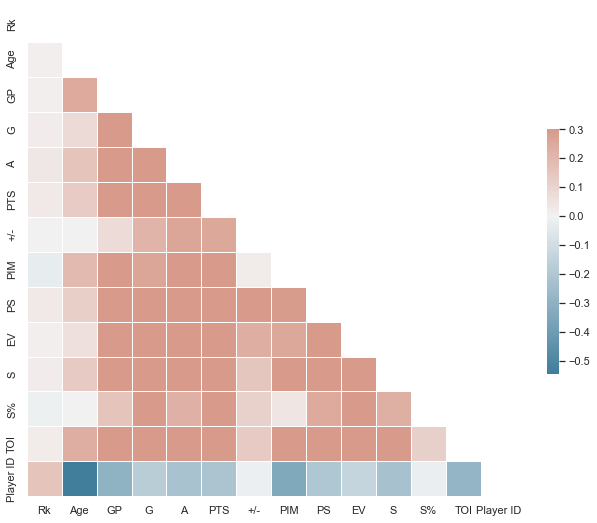

In [239]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#['crs_elapsed_time', 'day', 'month', 'speed', ]

In [241]:
X = values.drop('PTS', axis=1)
y = np.array(values['PTS'])
# Z = np.array(test['PTS']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=11)

reg = LinearRegression()
reg.fit(X_train, y_train)


print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))

Train R2: 1.0
Test R2: 1.0


# Individual LR ??

In [237]:
X = np.array(values['Age']).reshape(-1, 1)
y = np.array(values['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.4f" % r2_score(y_test, y_pred))

Train R2: 0.003233021908128575
Test R2: 0.004253551502816588
Coefficients: 
 [0.26019036]
Mean squared error: 396.48
Coefficient of determination (R2): 0.0043


(0.0, 125.0)

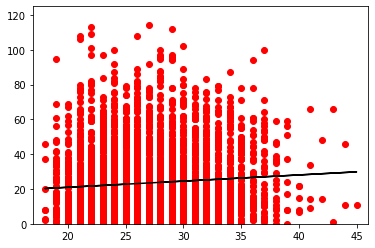

In [238]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(17, 46)
plt.ylim(0, 125)

In [240]:
X = np.array(values['GP']).reshape(-1, 1)
y = np.array(values['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.4f" % r2_score(y_test, y_pred))

Train R2: 0.4244420589815876
Test R2: 0.43060246363725163
Coefficients: 
 [0.61021131]
Mean squared error: 226.72
Coefficient of determination (R2): 0.4306


In [244]:
model = LinearRegression()

# create poly features 
Xpoly_train = PolynomialFeatures(degree=2).fit_transform(X_train)
Xpoly_test = PolynomialFeatures(degree=2).fit_transform(X_test)
print(f'Number of polynomial features: {Xpoly_train.shape[1]}')

Number of polynomial features: 190


In [245]:
# train model
model.fit(Xpoly_train, y_train)
ypoly_train_pred = model.predict(Xpoly_train)
ypoly_test_pred = model.predict(Xpoly_test)

In [246]:
# Check performance on train and test set
r2poly_train = r2_score(y_train, ypoly_train_pred)
r2poly_test = r2_score(y_test, ypoly_test_pred)
print(f'Train R^2:\t{r2poly_train}\nTest R^2:\t{r2poly_test}')

Train R^2:	1.0
Test R^2:	1.0


In [249]:
# save model to disk
filename = 'C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/output/models/r_poly_model481.sav'
pickle.dump(model, open(filename, 'wb'))

In [250]:
filename = 'C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/output/models/r_poly_model481.sav'
loaded_model = pickle.load(open(filename, 'rb'))
results = loaded_model.score(Xpoly_test, y_test)
print('Test r^2 Score: ', results)

Test r^2 Score:  1.0


## Scaled Data

In [253]:
def scale_data(X, doit=True):
    if doit == True:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        pass
    
    return X_scaled

In [251]:
from sklearn.decomposition import PCA

In [265]:
X = values.drop('PTS', axis=1)
y = np.array(values['PTS'])

In [262]:
X_scaled = scale_data(X, True)

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.4f" % r2_score(y_test, y_pred))

Train R2: 1.0
Test R2: 1.0
Coefficients: 
 [ 4.12551061e-16 -5.33427469e-16 -4.57912364e-16 -6.70938419e-15
  2.45759833e-15  1.00000000e+00  1.00000000e+00  6.05684038e-16
  5.17123779e-16  1.96832669e-15  1.77784592e-16 -2.15214131e-17
  7.60701655e-16 -5.13911830e-17 -2.40902077e-14  6.94964180e-15
  8.69056651e-16 -5.03069808e-17]
Mean squared error: 0.00
Coefficient of determination (R2): 1.0000


In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.4f" % r2_score(y_test, y_pred))

Train R2: 1.0
Test R2: 1.0
Coefficients: 
 [ 4.12551061e-16 -5.33427469e-16 -4.57912364e-16 -6.70938419e-15
  2.45759833e-15  1.00000000e+00  1.00000000e+00  6.05684038e-16
  5.17123779e-16  1.96832669e-15  1.77784592e-16 -2.15214131e-17
  7.60701655e-16 -5.13911830e-17 -2.40902077e-14  6.94964180e-15
  8.69056651e-16 -5.03069808e-17]
Mean squared error: 0.00
Coefficient of determination (R2): 1.0000


In [267]:
import seaborn as sns

In [282]:
reg.coef_

array([ 4.12551061e-16, -5.33427469e-16, -4.57912364e-16, -6.70938419e-15,
        2.45759833e-15,  1.00000000e+00,  1.00000000e+00,  6.05684038e-16,
        5.17123779e-16,  1.96832669e-15,  1.77784592e-16, -2.15214131e-17,
        7.60701655e-16, -5.13911830e-17, -2.40902077e-14,  6.94964180e-15,
        8.69056651e-16, -5.03069808e-17])

In [270]:
y_pred

array([ 8., 10., 17., ..., 22.,  9., 28.])

In [280]:
sns.scatterplot(X_test, y_pred)

ValueError: Per-column arrays must each be 1-dimensional